<a href="https://colab.research.google.com/github/lauraluebbert/US_gun_violence/blob/main/gun_violence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
!git clone https://github.com/lauraluebbert/US_gun_violence.git

Cloning into 'US_gun_violence'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 58 (delta 9), reused 47 (delta 5), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fsize = 15
import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

In [206]:
df = pd.read_csv("US_gun_violence/all.tsv", sep="\t")
df["date"] = pd.to_datetime(df["date"])

In [207]:
df["date"]

0       2020-12-31
1       2020-12-31
2       2020-12-26
3       2020-12-26
4       2020-12-26
           ...    
40761   2017-01-16
40762   2017-01-16
40763   2017-01-16
40764   2017-01-16
40765   2017-01-16
Name: date, Length: 40766, dtype: datetime64[ns]

In [208]:
df[np.logical_or(df["category"] == "defense", df["category"] == "mass_shooting")]

,id,date,state,locale,address,killed,injured,operations,category
0,1891461,2020-12-31,Indiana,Indianapolis,8215 Center Run Road,1,3,NaN,mass_shooting
1,1890946,2020-12-31,Oregon,Happy Valley,9200 block of SE Idleman Rd,0,4,NaN,mass_shooting
2,1886974,2020-12-26,Illinois,Rockford,4007 E State St,3,3,NaN,mass_shooting
3,1886913,2020-12-26,Florida,Tampa,N 20th St and E 7th Ave,2,2,NaN,mass_shooting
4,1887059,2020-12-26,Massachusetts,Lynn,Washington St and Quincy Ter,1,5,NaN,mass_shooting
...,...,...,...,...,...,...,...,...,...
40761,753171,2017-01-16,Kentucky,Louisville,2700 block of Gardiner Lane,0,0,NaN,defense
40762,752875,2017-01-16,Georgia,Tyrone,400 block of Palmetto Rd,1,0,NaN,defense
40763,753184,2017-01-16,Alabama,Dothan,1152 3rd Ave #3,1,0,NaN,defense
40764,754817,2017-01-16,South Carolina,Hartsville,Ousleydale Rd,0,2,NaN,defense


In [209]:
kids = df.query("category == 'teens' or category=='children'")

In [210]:
kids.id.nunique()

23343

In [211]:
kids.shape

(23578, 9)

In [212]:
defense = df[df["category"] == "defense"]
mass = df[df["category"] == "mass_shooting"]
teens = df.query("category == 'teens'")
children = df.query("category=='children'")

In [213]:
teens_f = teens[~teens["id"].isin(children["id"])]
children_f = children[~children["id"].isin(teens["id"])]

In [214]:
kids = pd.concat([teens_f, children_f])

In [215]:
kids.shape

(23108, 9)

In [216]:
df_defense_m = defense[~defense["id"].isin(mass["id"])]
df_mass = mass[~mass["id"].isin(defense["id"])]

df_defense_k = defense[~defense["id"].isin(kids["id"])]
df_kids = kids[~kids["id"].isin(defense["id"])]

In [217]:
df_defense_m.shape[0] + df_mass.shape[0], df_defense_k.shape[0] + df_kids.shape[0]

(17038, 35716)

In [218]:
df_md = pd.concat([df_defense_m, df_mass])
df_kd = pd.concat([df_defense_k, df_kids])
df_md["id"].nunique(), df_kd["id"].nunique()

(17038, 35716)

In [219]:
df_defense_m.index = df_defense_m["date"]
df_mass.index = df_mass["date"]

df_defense_k.index = df_defense_k["date"]
df_kids.index = df_kids["date"]

In [220]:
defense_m_num_incident = df_defense_m.resample("M")["killed"].count() # number of incidences
defense_m_num_killed = df_defense_m.resample("M")["killed", "injured"].sum().sum(1) # number of deaths and injuries

mass_num_incident = df_mass.resample("M")["killed"].count() # number of incidences
mass_num_killed = df_mass.resample("M")["killed", "injured"].sum().sum(1) # number of deaths and injuries


defense_k_num_incident = df_defense_k.resample("M")["killed"].count() # number of incidences
defense_k_num_killed = df_defense_k.resample("M")["killed", "injured"].sum().sum(1) # number of deaths and injuries

kids_num_incident = df_kids.resample("M")["killed"].count() # number of incidences
kids_num_killed = df_kids.resample("M")["killed", "injured"].sum().sum(1) # number of deaths and injuries

In [221]:
from sklearn.linear_model import LinearRegression

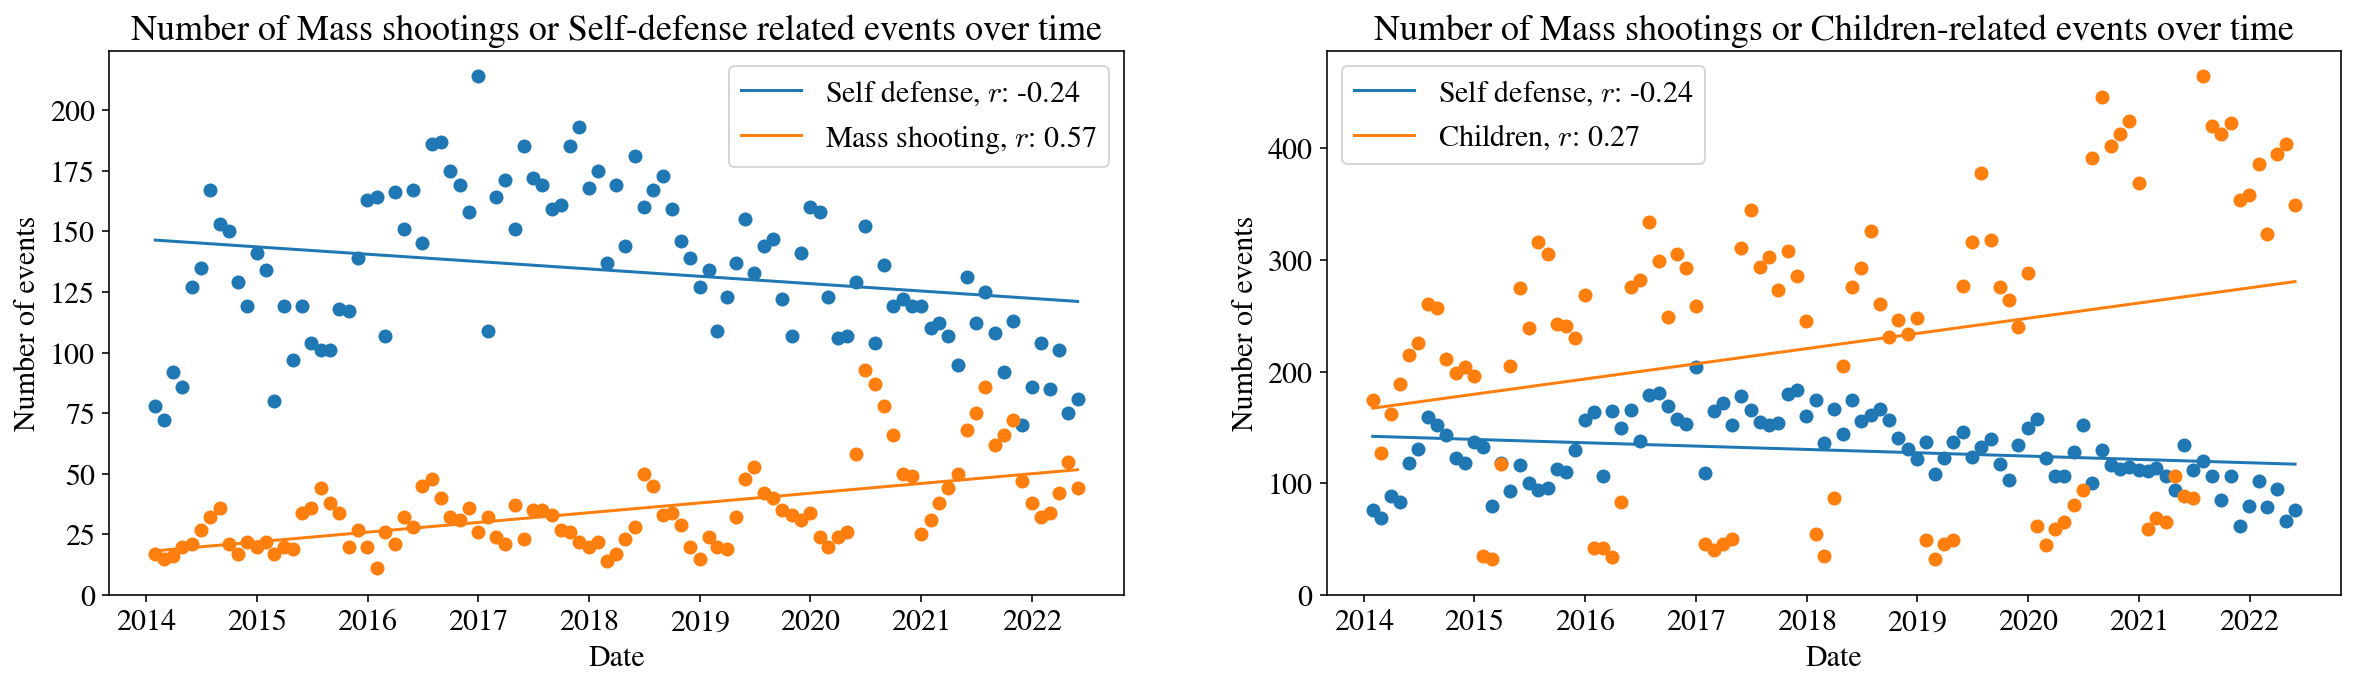

In [222]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=2)

ax = axs[0]
x = defense_m_num_incident.index
y = defense_m_num_incident.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y)
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]],  label=f"Self defense, $r$: -{r:,.2f}")

x = mass_num_incident.index
y = mass_num_incident.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y)
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]], label=f"Mass shooting, $r$: {r:,.2f}")

ax.legend()

ax.set(**{
    "xlabel": "Date",
    "ylabel": "Number of events",
    "title": "Number of Mass shootings or Self-defense related events over time",
    "ylim": 0
})

ax = axs[1]
x = defense_k_num_incident.index
y = defense_k_num_incident.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y)
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]],  label=f"Self defense, $r$: -{r:,.2f}")

x = kids_num_incident.index
y = kids_num_incident.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y)
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]], label=f"Children, $r$: {r:,.2f}")

ax.legend()

ax.set(**{
    "xlabel": "Date",
    "ylabel": "Number of events",
    "title": "Number of Mass shootings or Children-related events over time",
    "ylim": 0
})

fig.show()

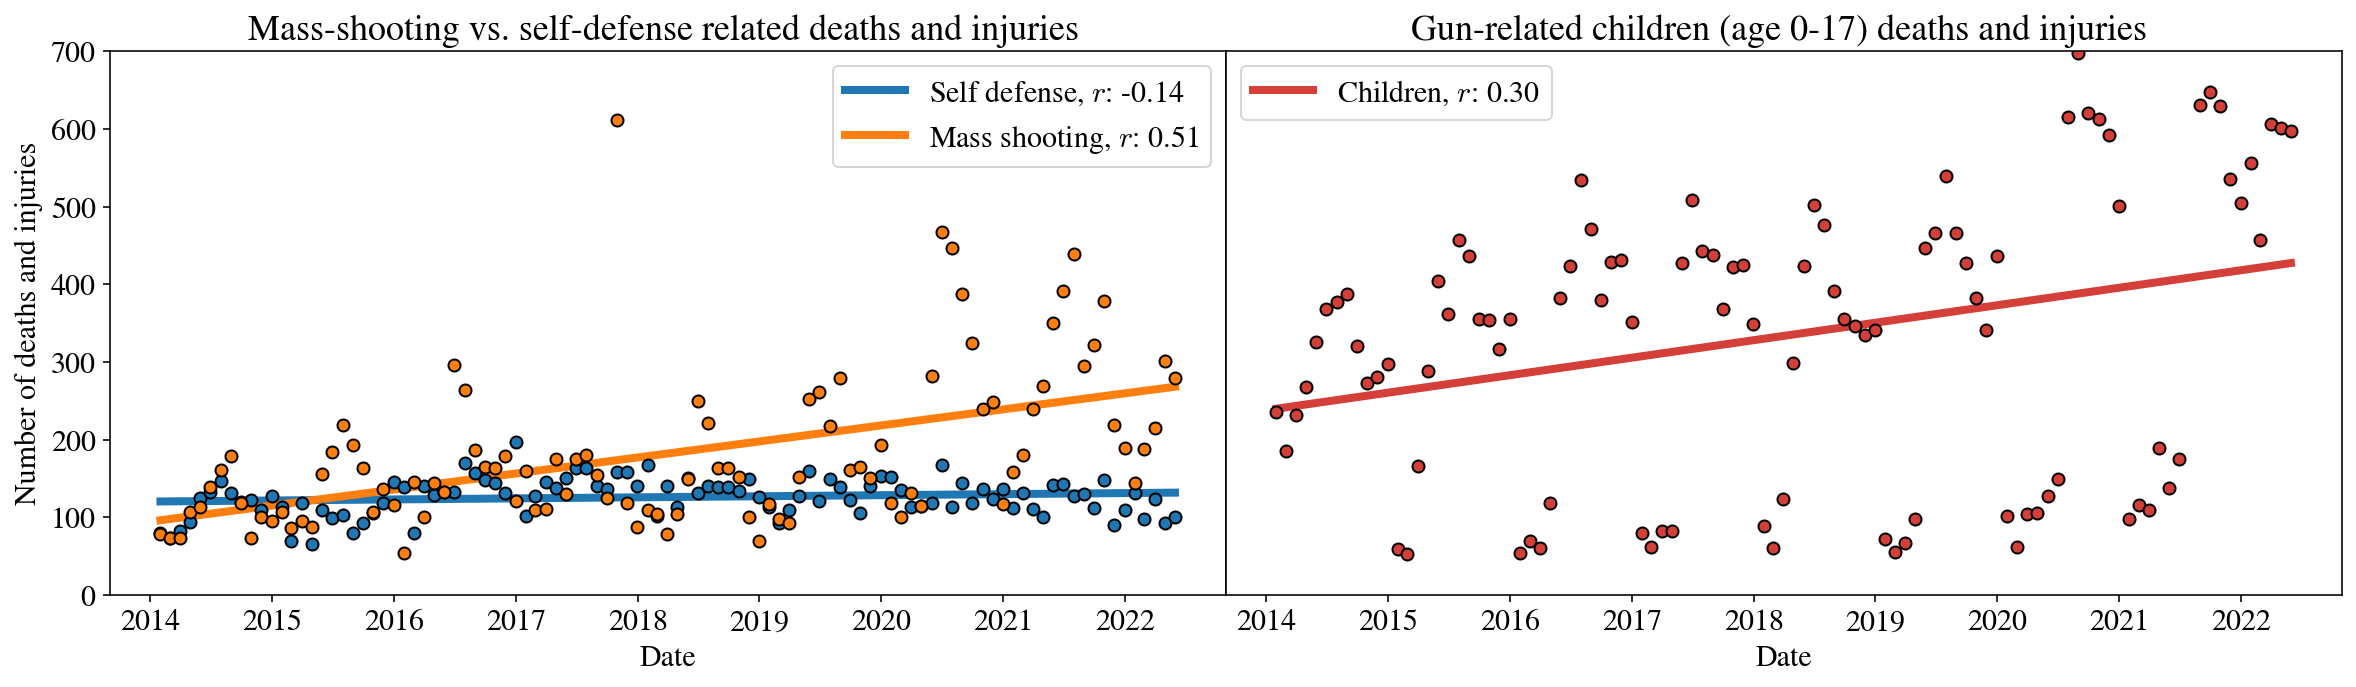

In [278]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=2)
fig.subplots_adjust(wspace=0)
ax = axs[0]
x = defense_m_num_killed.index
y = defense_m_num_killed.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y, edgecolor="k")
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]],  label=f"Self defense, $r$: -{r:,.2f}", linewidth=4, zorder=-1)

x = mass_num_killed.index
y = mass_num_killed.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y, edgecolor="k")
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]], label=f"Mass shooting, $r$: {r:,.2f}", linewidth=4, zorder=-1)

ax.legend()

ax.set(**{
    "xlabel": "Date",
    "ylabel": "Number of deaths and injuries",
    "title": "Mass-shooting vs. self-defense related deaths and injuries ",
    "ylim": (0, 700)
})

ax = axs[1]
x = kids_num_killed.index
y = kids_num_killed.values

xx = (x - x[0]).days.values
reg = LinearRegression().fit(xx.reshape(-1,1), y)
xxx = np.array([xx.min(), xx.max()])
yyy = reg.coef_*xxx + reg.intercept_
r = np.sqrt(reg.score(xx.reshape(-1,1), y))

ax.scatter(x,y, color="#D43F3A", edgecolor="k")
ax.plot([x[0], x[-1]], [yyy[0], yyy[-1]], label=f"Children, $r$: {r:,.2f}", color="#D43F3A", linewidth=4, zorder=-1)

ax.legend()

ax.set(**{
    "xlabel": "Date",
    "ylabel": "",
    "title": "Gun-related children (age 0-17) deaths and injuries ",
    "ylim": (0, 700),
    "yticks": [],
    "yticklabels": []
})
fig.show()

In [270]:
tmp = df_kids.groupby(df_kids.index.month)["killed", "injured"].sum().sum(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


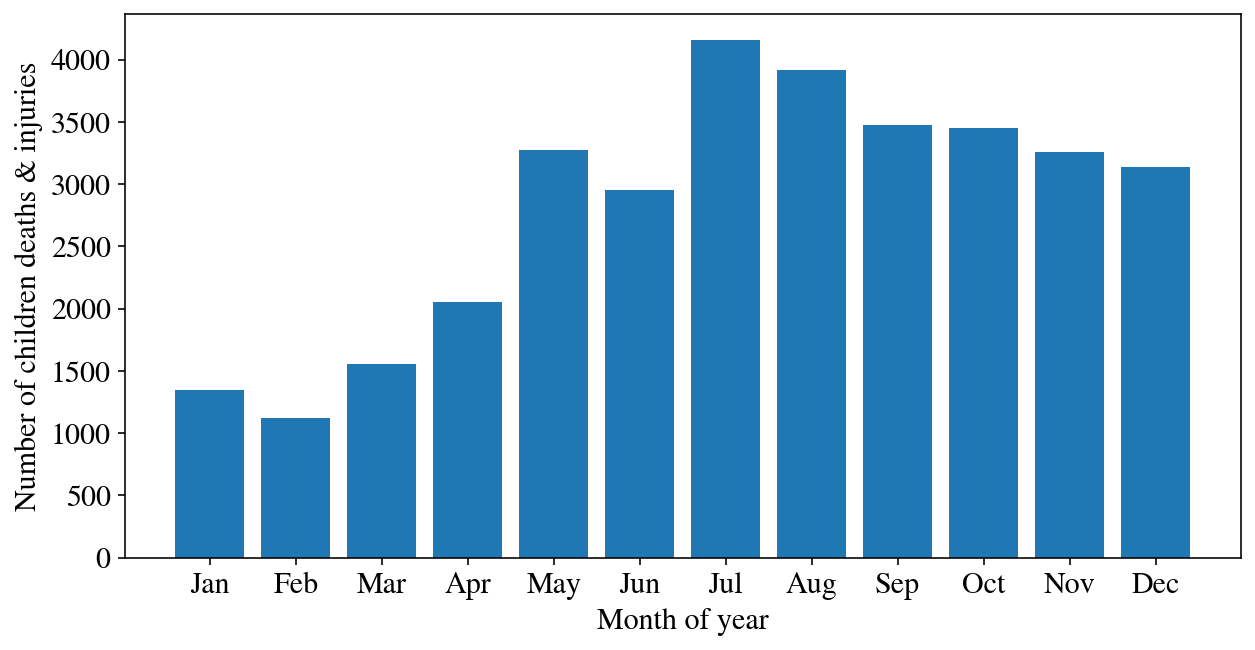

In [271]:
fig, ax = plt.subplots(figsize=(10,5))

week = tmp.index
vals = tmp.values

ax.bar(week, vals)

ax.set(**{
    "xticklabels": [
                    "Jan",
                    "Feb",
                    "Mar",
                    "Apr",
                    "May",
                    "Jun",
                    "Jul",
                    "Aug",
                    "Sep",
                    "Oct",
                    "Nov",
                    "Dec"
    ],
    "xticks": np.arange(12)+1,
    "xlabel": "Month of year",
    "ylabel": "Number of children deaths & injuries"
})

fig.show()

In [262]:
tmp = df_mass.groupby(df_mass.index.month)["killed", "injured"].sum().sum(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


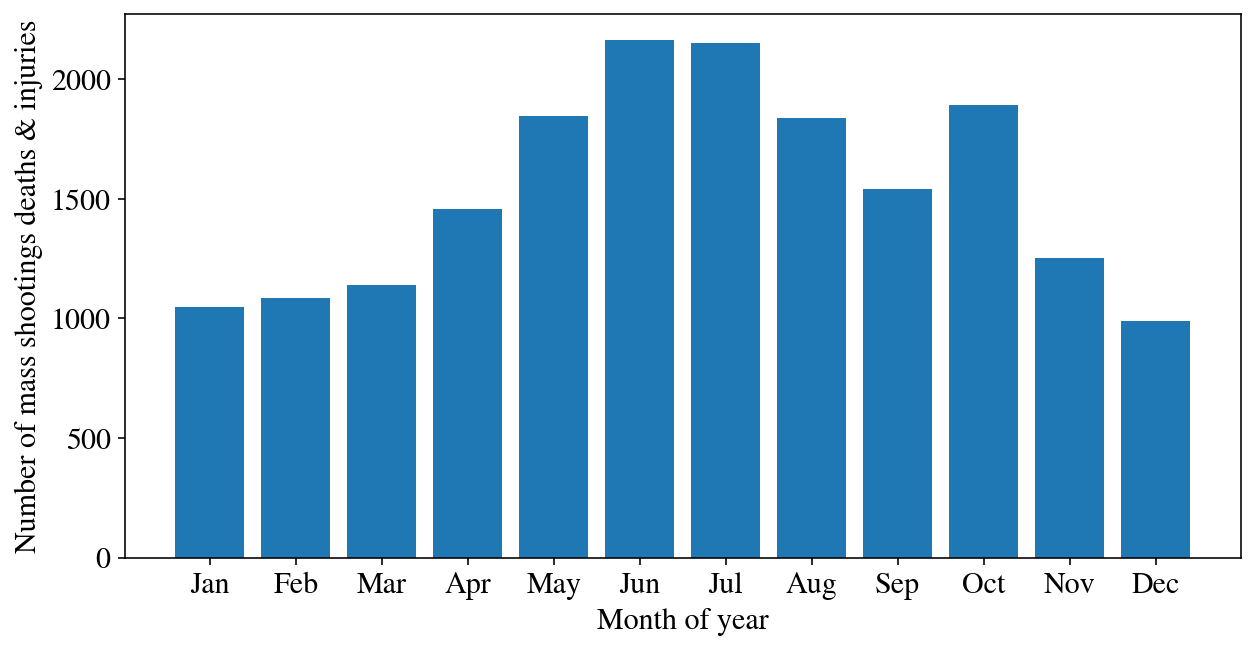

In [263]:
fig, ax = plt.subplots(figsize=(10,5))

week = tmp.index
vals = tmp.values

ax.bar(week, vals)

ax.set(**{
    "xticklabels": [
                    "Jan",
                    "Feb",
                    "Mar",
                    "Apr",
                    "May",
                    "Jun",
                    "Jul",
                    "Aug",
                    "Sep",
                    "Oct",
                    "Nov",
                    "Dec"
    ],
    "xticks": np.arange(12)+1,
    "xlabel": "Month of year",
    "ylabel": "Number of mass shootings deaths & injuries"
})

fig.show()

In [241]:
# how many childrens deaths come from mass shootings

In [256]:
dmk1 = df_kids[df_kids.id.isin(df_mass.id)]

In [257]:
tmp = dmk1.groupby(dmk1.index.month)["killed", "injured"].sum().sum(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [258]:
nkids = df_kids.groupby(df_kids.index.month)["killed", "injured"].sum().sum(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


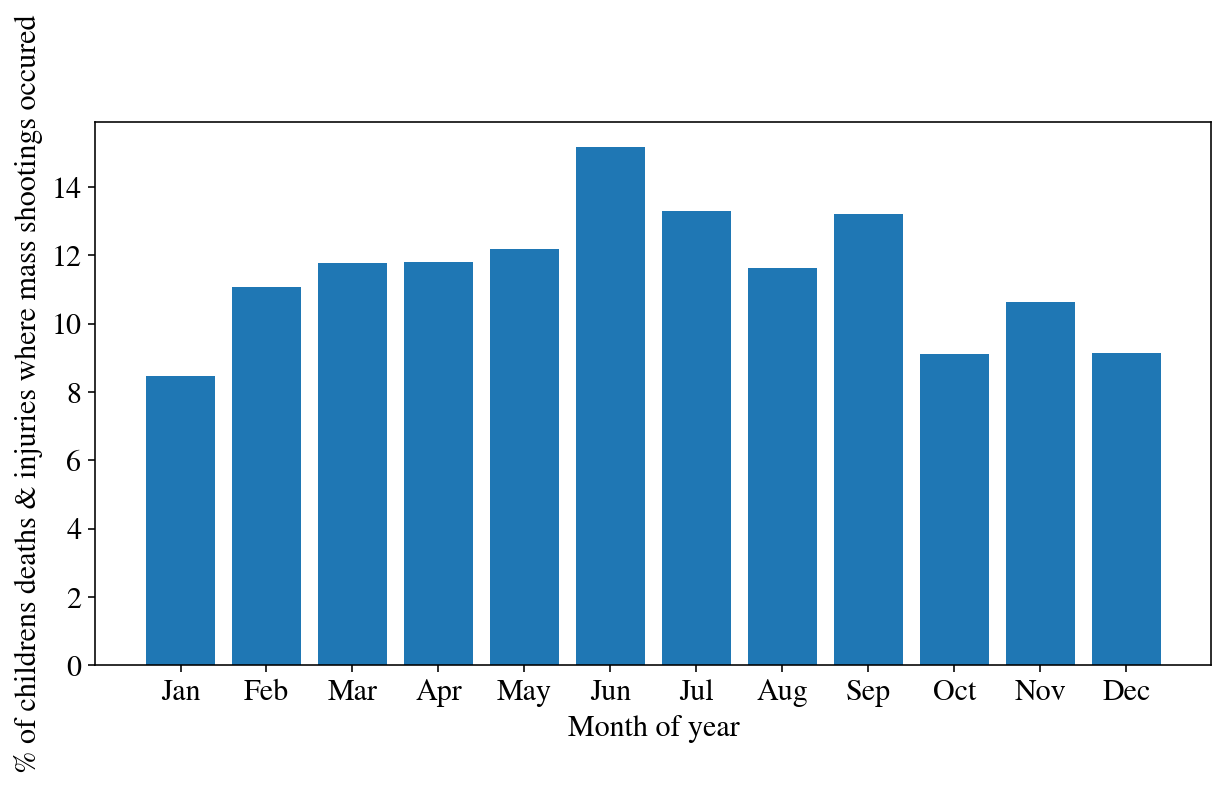

In [259]:
fig, ax = plt.subplots(figsize=(10,5))

week = tmp.index 
vals = tmp.values/ nkids.values*100

ax.bar(week, vals)

ax.set(**{
    "xticklabels": [
                    "Jan",
                    "Feb",
                    "Mar",
                    "Apr",
                    "May",
                    "Jun",
                    "Jul",
                    "Aug",
                    "Sep",
                    "Oct",
                    "Nov",
                    "Dec"
    ],
    "xticks": np.arange(12)+1,
    "xlabel": "Month of year",
    "ylabel": "% of childrens deaths & injuries where mass shootings occured"
})

fig.show()